In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
#load the data from the UCI repository into pandas dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

In [3]:
columns = ["SampleID","ClumpThickness","CellSizeUniformity","CellShapeUniformity",
           "MarginalAdhesion","EpithelialCellSize","BareNuclei","BlandChromatin",
           "NormalNucleoli","Mitoses","Class"]

In [5]:
#read CSV, treating '?' as missing (NaN) for BareNuclei 
df = pd.read_csv(url, names=columns, header=None, na_values="?")
print(f"Data Shape: {df.shape}")

Data Shape: (699, 11)


In [6]:
df.head()

,SampleID,ClumpThickness,CellSizeUniformity,CellShapeUniformity,MarginalAdhesion,EpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SampleID             699 non-null    int64  
 1   ClumpThickness       699 non-null    int64  
 2   CellSizeUniformity   699 non-null    int64  
 3   CellShapeUniformity  699 non-null    int64  
 4   MarginalAdhesion     699 non-null    int64  
 5   EpithelialCellSize   699 non-null    int64  
 6   BareNuclei           683 non-null    float64
 7   BlandChromatin       699 non-null    int64  
 8   NormalNucleoli       699 non-null    int64  
 9   Mitoses              699 non-null    int64  
 10  Class                699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [8]:
#inspecting the missing values
missing_counts = df.isna().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 SampleID                0
ClumpThickness          0
CellSizeUniformity      0
CellShapeUniformity     0
MarginalAdhesion        0
EpithelialCellSize      0
BareNuclei             16
BlandChromatin          0
NormalNucleoli          0
Mitoses                 0
Class                   0
dtype: int64


In [9]:
#drop rows with missing values
df_clean = df.dropna()
print(f"Shape after dropping missing: {df_clean.shape}")

Shape after dropping missing: (683, 11)


In [11]:
#checking for duplicates
num_duplicates = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 8


In [12]:
#remove duplicates, while keeping the first occurance
df_clean =df_clean.drop_duplicates()
print(f"Shape after dropping the duplicates: {df_clean.shape}")

Shape after dropping the duplicates: (675, 11)


In [15]:
#Data types and format checks
#ensuring numeric features are of numeric dtype
numeric_cols= ["ClumpThickness","CellSizeUniformity","CellShapeUniformity",
           "MarginalAdhesion","EpithelialCellSize","BareNuclei","BlandChromatin",
           "NormalNucleoli","Mitoses",]
df_clean[numeric_cols] = df_clean[numeric_cols].apply(pd.to_numeric)
print(df_clean[numeric_cols].dtypes)

ClumpThickness           int64
CellSizeUniformity       int64
CellShapeUniformity      int64
MarginalAdhesion         int64
EpithelialCellSize       int64
BareNuclei             float64
BlandChromatin           int64
NormalNucleoli           int64
Mitoses                  int64
dtype: object


In [17]:
#are there any non-integer values in the dataset?
non_int_bare_nuclei = df_clean[~(df_clean['BareNuclei']%1==0)]
print(non_int_bare_nuclei)

Empty DataFrame
Columns: [SampleID, ClumpThickness, CellSizeUniformity, CellShapeUniformity, MarginalAdhesion, EpithelialCellSize, BareNuclei, BlandChromatin, NormalNucleoli, Mitoses, Class]
Index: []


In [18]:
# Convert BareNuclei to integer if all values are whole numbers
df_clean['BareNuclei'] = df_clean['BareNuclei'].astype(int)

In [19]:
# Confirm data types
print(df_clean.dtypes)

SampleID               int64
ClumpThickness         int64
CellSizeUniformity     int64
CellShapeUniformity    int64
MarginalAdhesion       int64
EpithelialCellSize     int64
BareNuclei             int64
BlandChromatin         int64
NormalNucleoli         int64
Mitoses                int64
Class                  int64
dtype: object


In [21]:
print("Value ranges for each feature:")
print(df_clean[numeric_cols].agg(['min', 'max']))

Value ranges for each feature:
     ClumpThickness  CellSizeUniformity  CellShapeUniformity  \
min               1                   1                    1   
max              10                  10                   10   

     MarginalAdhesion  EpithelialCellSize  BareNuclei  BlandChromatin  \
min                 1                   1           1               1   
max                10                  10          10              10   

     NormalNucleoli  Mitoses  
min               1        1  
max              10       10  


In [22]:
#visualize all numeric features
import matplotlib.pyplot as plt
import seaborn as sns

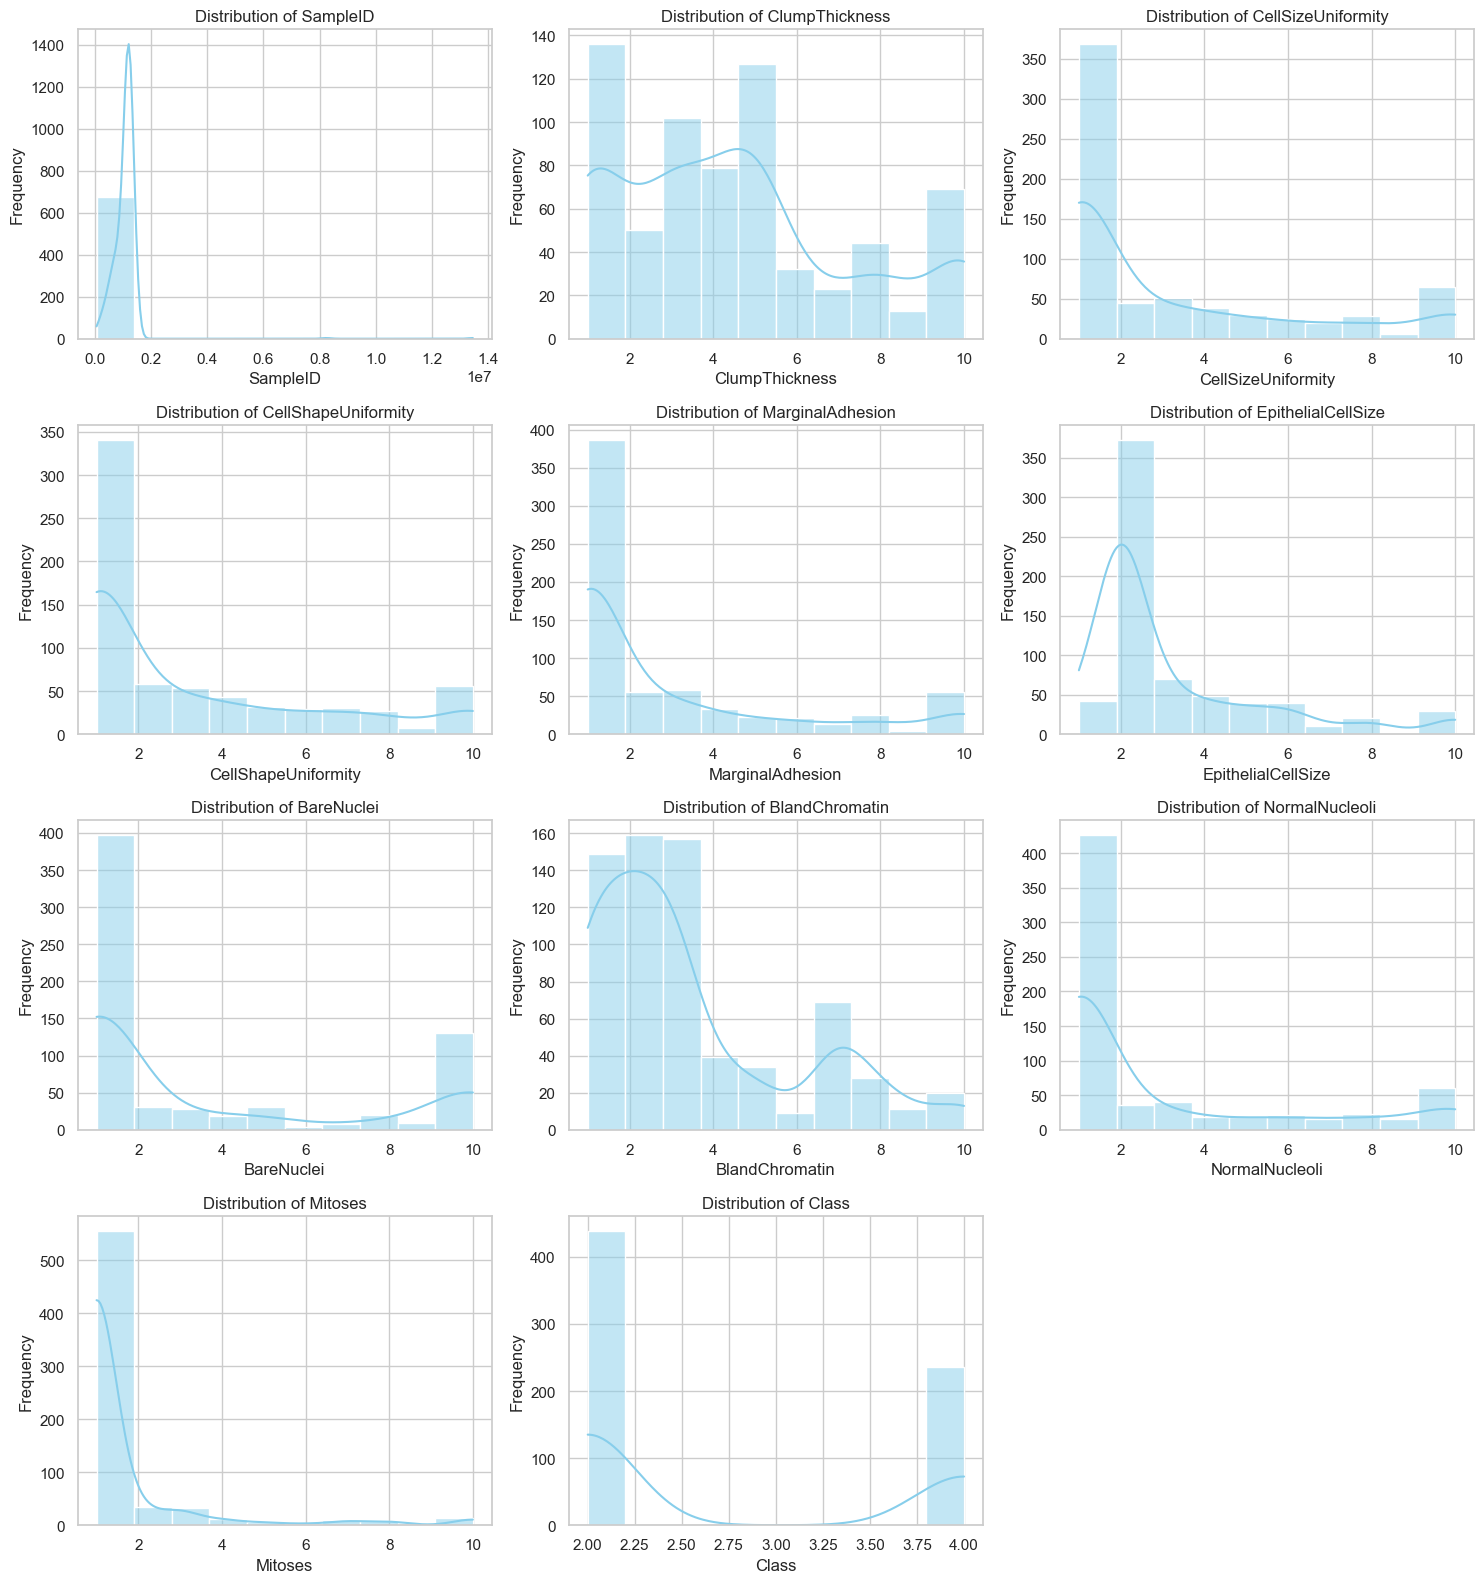

In [24]:
#set plot style
sns.set(style='whitegrid')

#set up the matplotlib figure
num_features=df_clean.select_dtypes(include=['int64','float64']).columns
n_cols = 3
n_rows = (len(num_features) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))

#loop through each feature and create a historgram
for i, feature in enumerate(num_features):
    plt.subplot(n_rows, n_cols, i+ 1)
    sns.histplot(df_clean[feature], bins=10, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
#Convert class labels
#map numeric classes to string labels
df_clean['Class'] = df_clean['Class'].replace({2: 'Benign', 4: 'Malignant'})
#convert to categorical dtype
df_clean['Class'] = df_clean['Class'].astype('category')
print(df_clean['Class'].value_counts())

Class
Benign       439
Malignant    236
Name: count, dtype: int64


In [30]:
#outlier detection using z-score

from scipy import stats

#compute z-scores for numeric features
z_scores = np.abs(stats.zscore(df_clean[numeric_cols]))
#identify any rows with a z-score > 3 in any feature (common threshold) - flag rows with any z-score > 3
outlier_flags = (z_scores > 3).any(axis=1)
#extract those rows
outliers = df_clean[outlier_flags]
print(f"Outliers detected: {outliers.shape[0]} rows")

Outliers detected: 50 rows


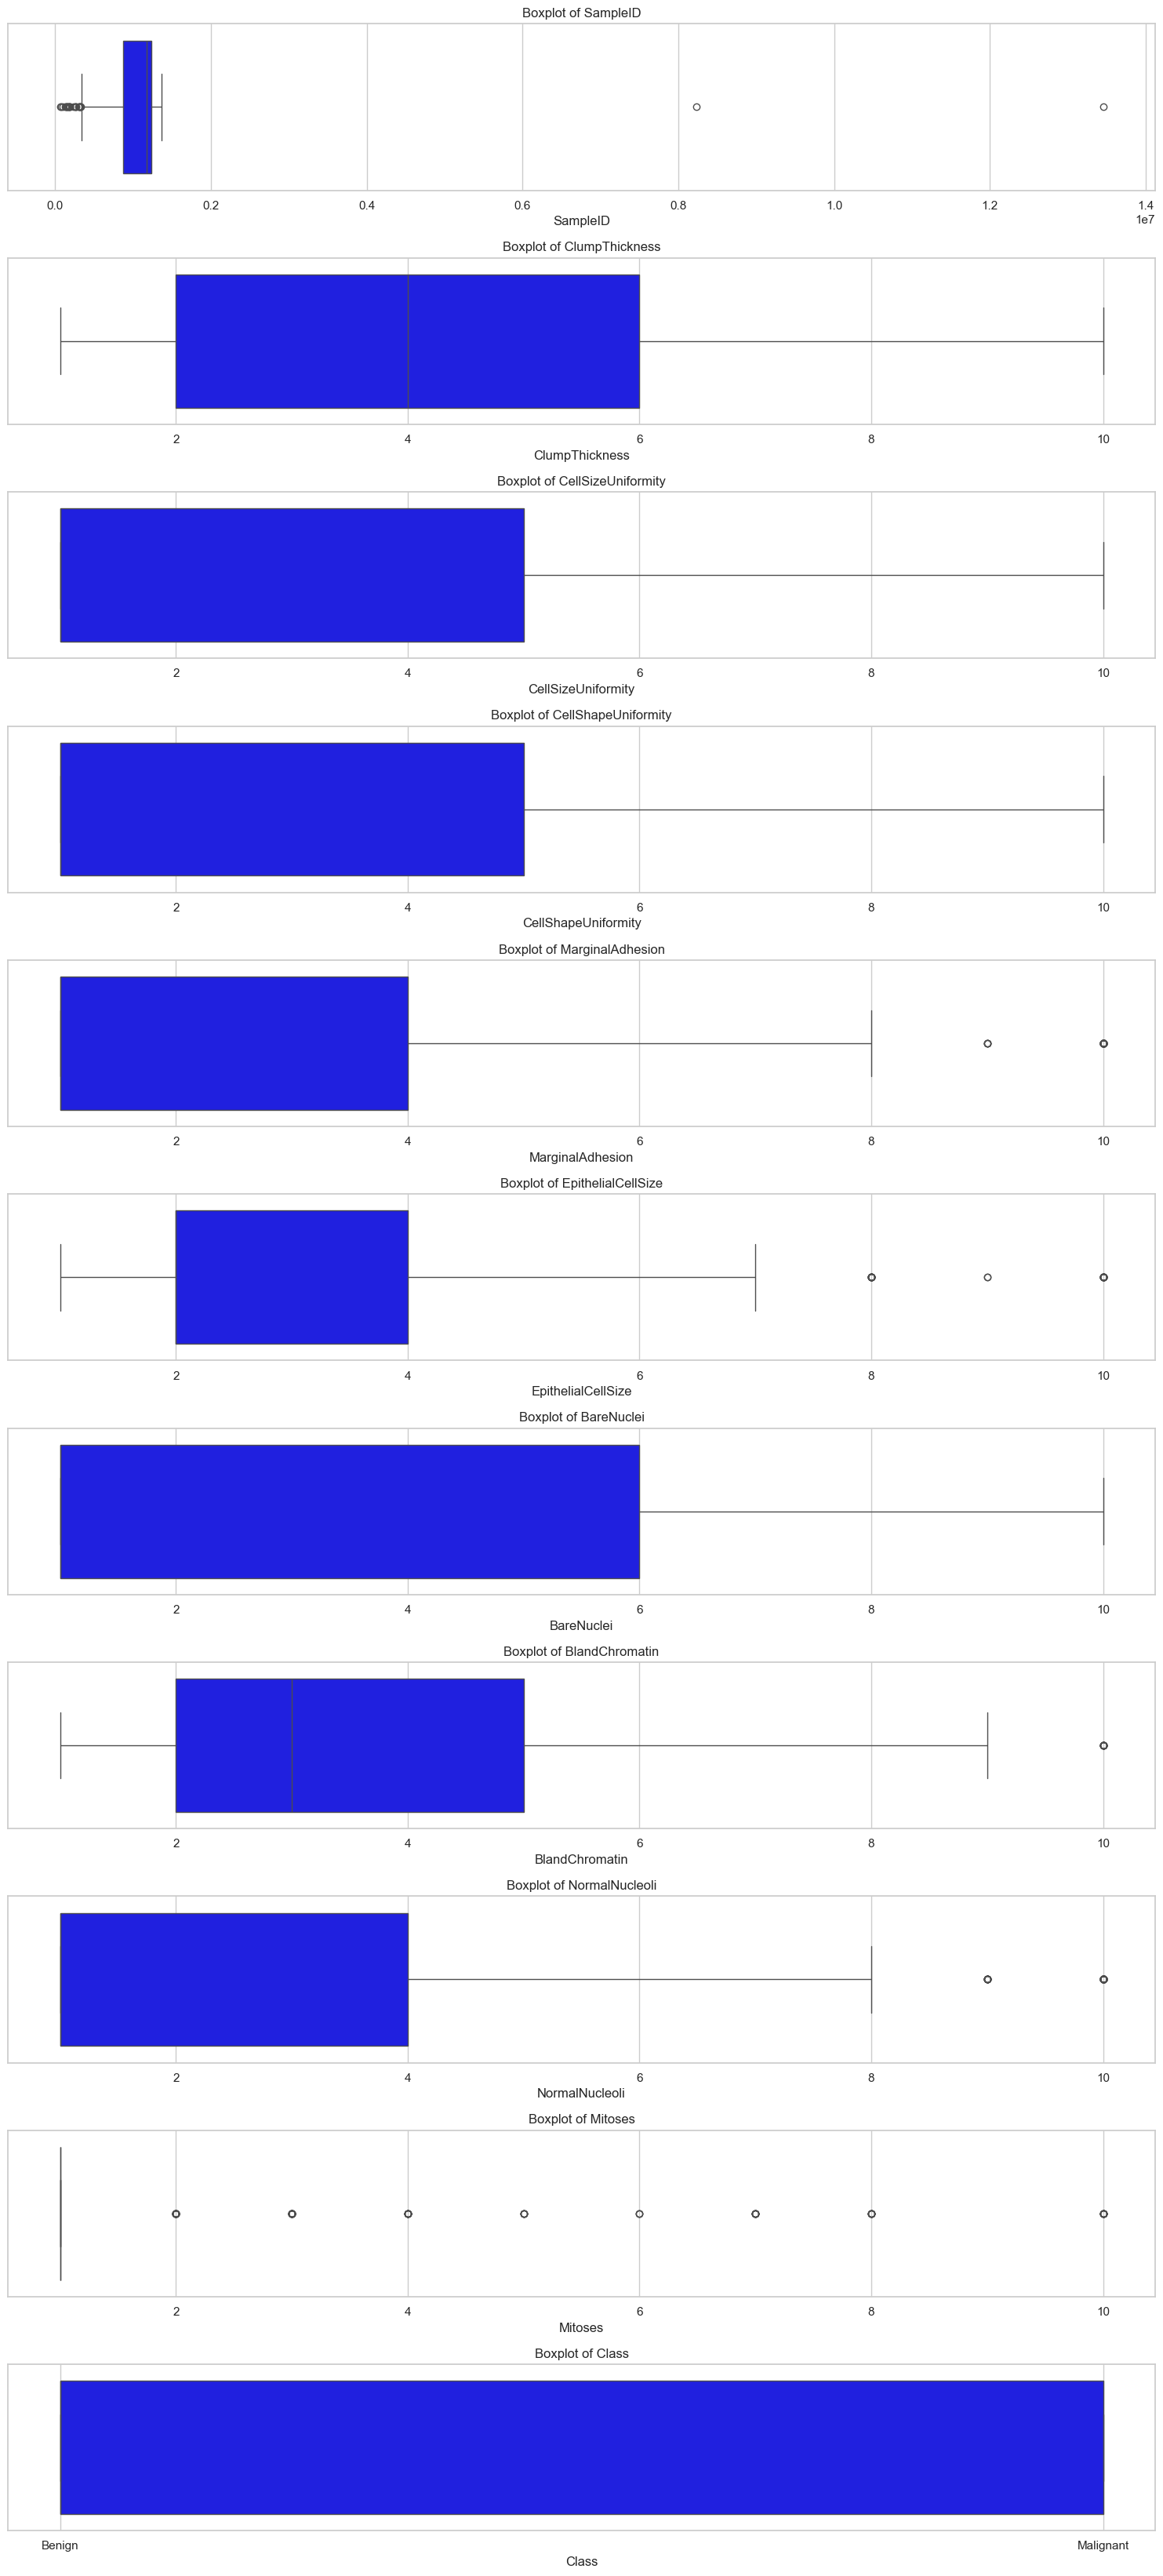

In [28]:
#Boxplot for each numeric feature to visually inspect outliers
plt.figure(figsize=(15, len(num_features) * 3))
for i, feature in enumerate(num_features):
    plt.subplot(len(num_features), 1, i+1)
    sns.boxplot(x=df_clean[feature], color='blue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Feature Correlation Heatmap')

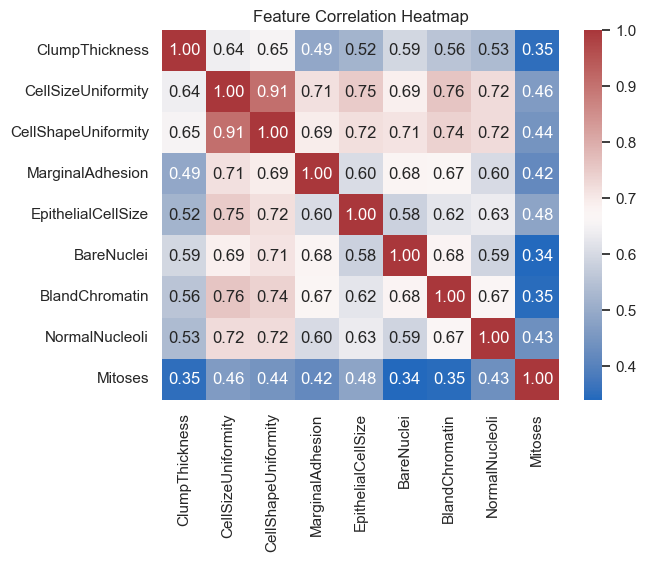

In [31]:
#visulaization and summary statistics
corr = df_clean[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag")
plt.title("Feature Correlation Heatmap")

In [ ]:
#Record linkage
